In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

In [2]:
# 標本分布のシミュレーション準備
# ここでは母集団は常に「平均４、　標準偏差０．８（分散０．６４）の正規分布」とします
population = stats.norm(loc = 4, scale = 0.8)

In [3]:
# 標本平均を何度も計算してみる

# 試行回数を10000回としてそれを格納する入れ物を用意する
sample_mean_array = np.zeros(10000)

In [4]:
# 10000個の標本平均を格納していく
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10) # 正規分布に従う乱数を発生させる
    sample_mean_array[i] = sp.mean(sample)

In [5]:
sample_mean_array

array([ 3.922,  3.864,  4.07 , ...,  4.136,  4.575,  4.099])

In [6]:
# 標本平均の平均値を計算

## 上記コードのシミュレーションで「１００００個の標本平均」が得られました。
## 次はその「１００００個の標本平均」のさらに平均値を求めていきます。

### sample_mean_arrayの平均値を求める
sp.mean(sample_mean_array)

4.004

In [7]:
### 標本平均の標準偏差を計算
sp.std(sample_mean_array, ddof = 0)

0.251

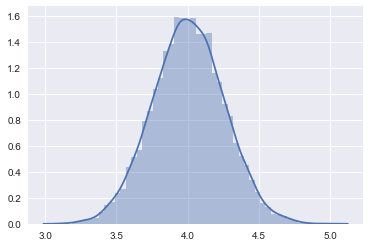

In [8]:
## 最後に標準偏差のヒストグラムを描いていきます
## これが「平均値の標準分布」となるわけです
sns.distplot(sample_mean_array)

In [9]:
# === サンプルサイズ大なら標本平均は母平均に近い ===
# サンプルサイズと標本平均と母平均の関係をみていきます

## まずは１０〜１０００１０まで１００区切りで変化させたサンプルサイズを用意します
size_array = np.arange(start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [10]:
## 次は標本平均を入れる入れ物を用意します
sample_mean_array_size = np.zeros(len(size_array))

In [11]:
## シミュレーションの実行
## 「標本平均を求める」試行をサンプルサイズを変えながら何度も実行していることになります
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

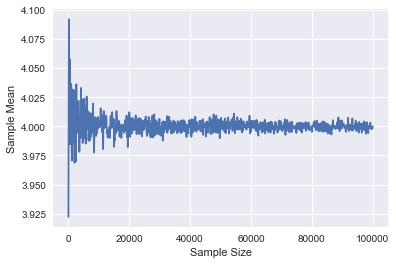

In [12]:
## グラフの描画
## 横軸にサンプルサイズを、縦軸に標本平均をおいた折れ線グラフを描きます
plt.plot(size_array, sample_mean_array_size)
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")

In [13]:
# === 考察 ===

# 上のグラフをみてみるとサンプルサイズが大きくなるほど標本平均は母平均（４）に近づいていくことがわかります

In [14]:
# === 標本平均を何度も計算する関数を作る ===

# これからシミュレーションをやりやすくするために「標本平均を何度も計算する関数」を作ってみましょう
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return (sample_mean_array)

In [15]:
## 動作確認
## 「１０個のデータから標本平均を得る」試行を１００００回繰り返します
## ６つ目のコードブロック[# 標本平均の平均値を計算]の結果と同じ結果になっていることを確認してください

np.random.seed(1)
sp.mean(calc_sample_mean(size = 10, n_trial = 10000))

4.004

In [16]:
# === サンプルサイズを変えた時の標本平均の分布 ===

# サンプルサイズを10, 20, 30と変化させていった時の標本平均の分布をバイオリンプロットで確認します
# まずはサンプルサイズごとの標本平均をpandasデータフレームにまとめます（試行回数は１００００とします）

np.random.seed(1)
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean" : size_10,
    "size" : np.tile("size 10", 10000)
})

size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean" : size_20,
    "size" : np.tile("size 20", 10000 )
})

size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean" : size_30,
    "size" : np.tile("size 30", 10000)
})


# 結合
sim_result = pd.concat( [size_10_df, size_20_df, size_30_df] )

# 結果の図示
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


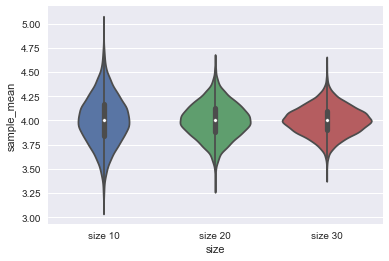

In [17]:
# 上で作成したデータを使ってバイオリンプロットを描画します

sns.violinplot(x = "size", y = "sample_mean", data = sim_result)

In [18]:
# === 標本平均の標準偏差は母標準偏差よりも小さい ===
# サンプルサイズが大きくなると標本平均のばらつきが小さくなることを「標本平均の標準偏差」をサンプルサイズ別にみていくことで再度確認していきます

# 2から100までを２区切りで変化させたサンプルサイズを用意します
size_array = np.arange(start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [19]:
# 次は「標本平均の標準偏差」を格納する入れ物を用意します

sample_mean_std_array = np.zeros(len(size_array))

In [20]:
# シミュレーションの実行。試行回数は１００回で固定しました
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size_array[i], n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof = 1)

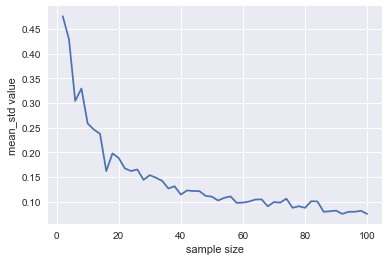

In [21]:
plt.plot(size_array, sample_mean_std_array)
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [22]:
# === 標準誤差 ===

standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([ 0.566,  0.4  ,  0.327,  0.283,  0.253,  0.231,  0.214,  0.2  ,
        0.189,  0.179,  0.171,  0.163,  0.157,  0.151,  0.146,  0.141,
        0.137,  0.133,  0.13 ,  0.126,  0.123,  0.121,  0.118,  0.115,
        0.113,  0.111,  0.109,  0.107,  0.105,  0.103,  0.102,  0.1  ,
        0.098,  0.097,  0.096,  0.094,  0.093,  0.092,  0.091,  0.089,
        0.088,  0.087,  0.086,  0.085,  0.084,  0.083,  0.083,  0.082,
        0.081,  0.08 ])

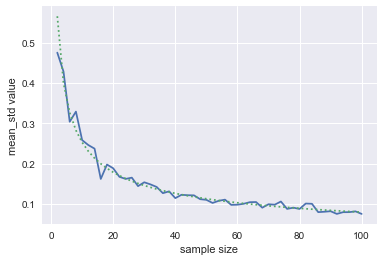

In [23]:
plt.plot(size_array, sample_mean_std_array)
plt.plot(size_array, standard_error, linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")